# TP3 - Parte 1

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid",rc={'figure.figsize':(15,8)})

In [2]:
def mean_encoder(df, featureNames, targetName):
    newDF = df.copy()
    for feature in featureNames:
        Mean_encoded_feature = newDF.groupby([feature])[targetName].mean().to_dict()
        newDF[feature] =  newDF[feature].map(Mean_encoded_feature)
    return newDF

In [4]:
trainTransact = pd.read_csv('data/train_transaction.csv')
trainId = pd.read_csv('data/train_identity.csv')
trainTransact.set_index('TransactionID', inplace=True)
trainId.set_index('TransactionID', inplace=True)
train = trainTransact.join(trainId, how= 'left')
del trainTransact
del trainId
train.rename(columns={'id_30':'os', 'id_31':'browser', 'addr1': 'billing_region', 'addr2': 'billing_country'},inplace=True)
train.head(15)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,browser,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


In [5]:
#porcentaje de fraudes por dominio de mail
domainpercent = (train.loc[train['isFraud'] == 1]['P_emaildomain'].value_counts() / train['P_emaildomain'].value_counts() * 100).dropna().sort_values(ascending=False)

Text(0.5, 1.0, 'Porcentaje de fraude por dominio de email de comprador')

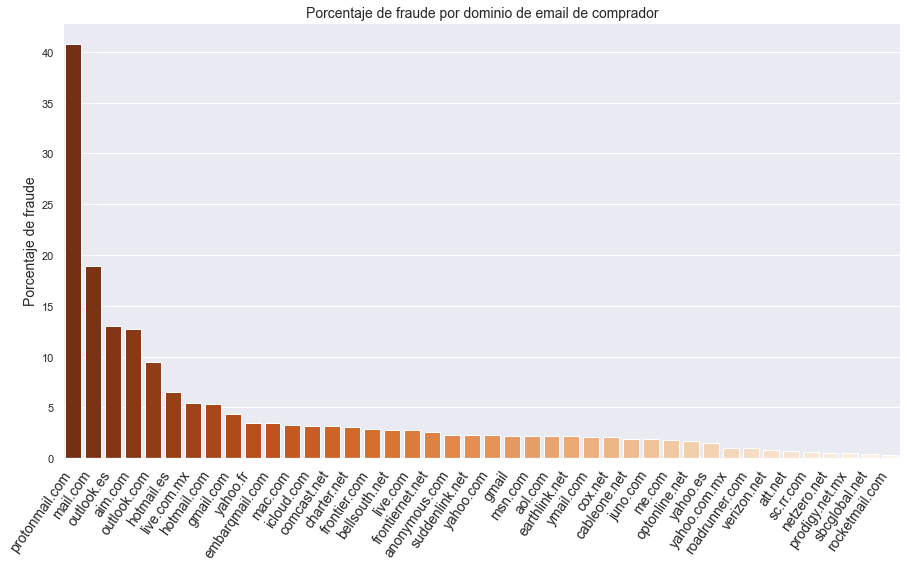

In [6]:
bar = sns.barplot(x= domainpercent.index, y= domainpercent, palette="Oranges_r")
bar.set_xticklabels(domainpercent.index, fontsize=14, rotation=55, ha= 'right');
bar.set_ylabel('Porcentaje de fraude', fontsize=14)
bar.set_title("Porcentaje de fraude por dominio de email de comprador", fontsize=20)

In [7]:
V232mean = train.groupby(by='isFraud')['V232'].mean()

In [8]:
train.groupby(by='isFraud')['V232'].count()

isFraud
0    120238
1     10192
Name: V232, dtype: int64

In [9]:
encodedTrain = mean_encoder(train, ['browser', 'os', 'P_emaildomain', 'DeviceInfo', 'card4', 'R_emaildomain'], 'isFraud')

<AxesSubplot:title={'center':'Casos de fraude por % para cada DeviceInfo'}, ylabel='% de fraude por DeviceInfo'>

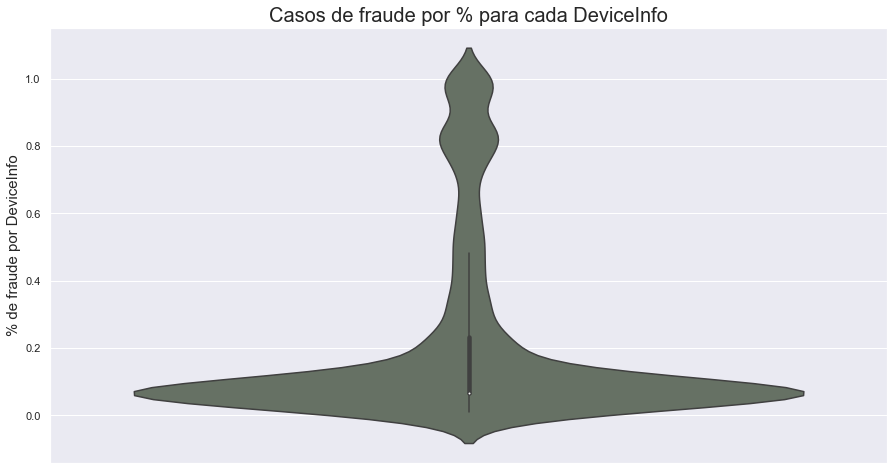

In [10]:
#distribucion de casos de fraude respecto del porcentaje de fraude para cada DeviceInfo
# significa que el fraude se efectúa mayormente en diferentes tipos de devices para que no pueda ser facilmente rastreable a unos pocos devices. 
plot_violin = sns.violinplot(y='DeviceInfo',data=encodedTrain.loc[train['isFraud'] == 1], palette= ['#647362'])
plot_violin.set_title('Distribución de fraude por % para cada DeviceInfo',size=20)
plot_violin.set_ylabel('% de fraude por DeviceInfo',size=15)
plot_violin

In [11]:
tarjetas = pd.read_csv('data/train_transaction.csv',usecols=["isFraud", "card4", "card6"] )


In [12]:
tarjetas['tarjeta'] = tarjetas.apply(lambda x: (str(x["card4"]), str(x["card6"])), axis=1)


In [13]:
tarjetas["card4"].fillna(value="NaN", inplace=True)
tarjetas["card6"].fillna(value="NaN", inplace=True)

In [14]:
porcentajes_tarjetas = tarjetas.pivot_table(values="isFraud", columns=["card4", 'card6']).apply(lambda x: x*100).stack().reset_index().drop(columns="level_0").set_index("card6")
porcentajes_tarjetas.rename(columns={'american express': 'American Express', 'discover':'Discover', 'mastercard':'Mastercard', 'visa':'Visa'},inplace=True)
porcentajes_tarjetas.index = ["NaN",'Charge Card','Credit','Debit', 'Debit or credit']
porcentajes_tarjetas

card4,NaN,American Express,Discover,Mastercard,Visa
NaN,2.492013,0.000000,NaN,NaN,NaN
Charge Card,NaN,0.000000,NaN,NaN,0.000000
Credit,33.333333,2.862385,7.931472,6.915229,6.812210
Debit,11.111111,3.472222,4.034582,2.156558,2.547646
Debit or credit,NaN,NaN,NaN,0.000000,NaN


Text(0.5, 1.0, 'Porcentaje de fraude por tarjeta')

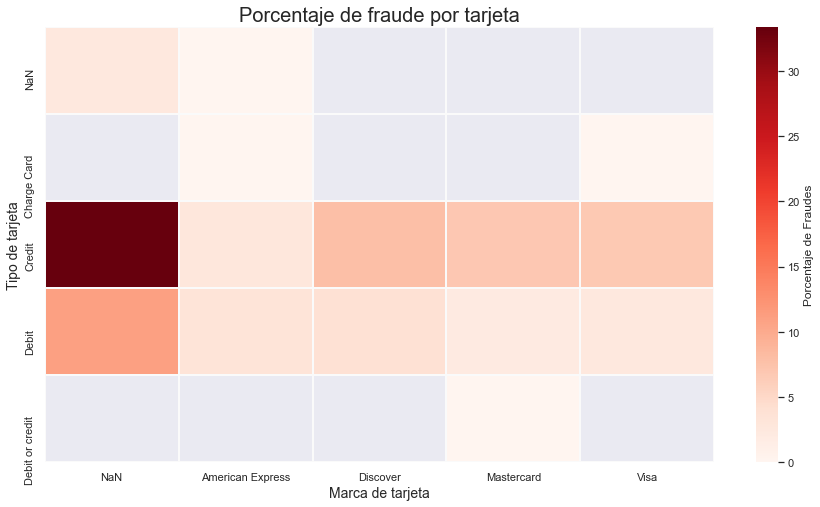

In [15]:
heat = sns.heatmap(data= porcentajes_tarjetas, cmap='Reds', linewidths=1, linecolor='#FAFAFA', cbar_kws={'label':'Porcentaje de Fraudes'})
heat.set_xlabel('Marca de tarjeta', fontsize=14)
heat.set_ylabel('Tipo de tarjeta', fontsize=14)
heat.set_title("Porcentaje de fraude por tarjeta", fontsize=20)

Text(0.5, 1.0, 'Valores de transacciones menores a 1000 USD')

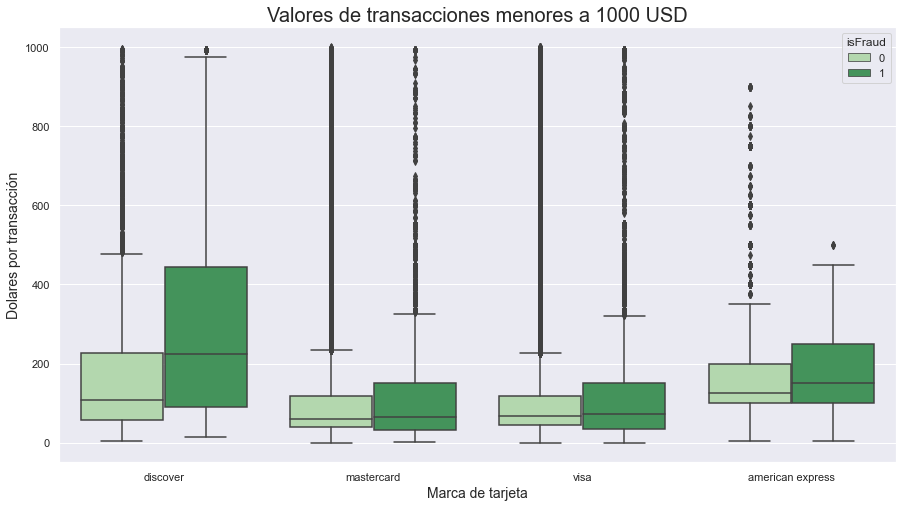

In [16]:
box = sns.boxplot(x='card4', y='TransactionAmt', data=train.loc[train['TransactionAmt'] < 1000] , hue="isFraud", palette='Greens')
box.set_ylabel('Dolares por transacción', fontsize=14)
box.set_xlabel('Marca de tarjeta', fontsize=14)
box.set_title("Valores de transacciones menores a 1000 USD", fontsize=20)
#box.legend(title='Es Fraude', loc='upper right' , labels=["No", "Si"], )

In [17]:
ubicaciones = train.loc[:,['billing_region', 'isFraud']]
ubicaciones

,billing_region,isFraud
TransactionID,,
2987000,315.0,0
2987001,325.0,0
2987002,330.0,0
2987003,476.0,0
2987004,420.0,0
...,...,...
3577535,272.0,0
3577536,204.0,0
3577537,231.0,0


Text(0.5, 1.0, 'Cantidad de fraudes por región de facturación')

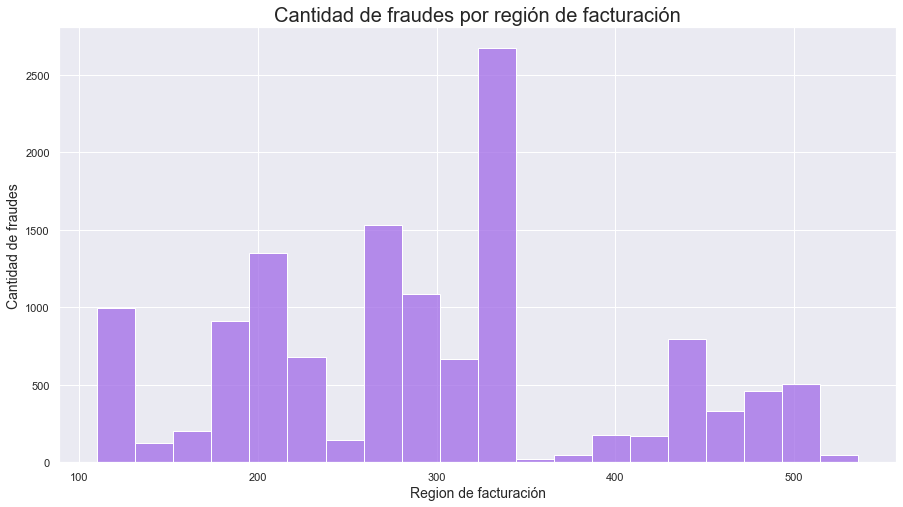

In [18]:
hist = sns.histplot(data=ubicaciones.loc[ubicaciones['isFraud']==1], x='billing_region', bins=20, color='#a16ae8')
hist.set_ylabel('Cantidad de fraudes', fontsize=14)
hist.set_xlabel('Region de facturación', fontsize=14)
hist.set_title("Cantidad de fraudes por región de facturación", fontsize=20)


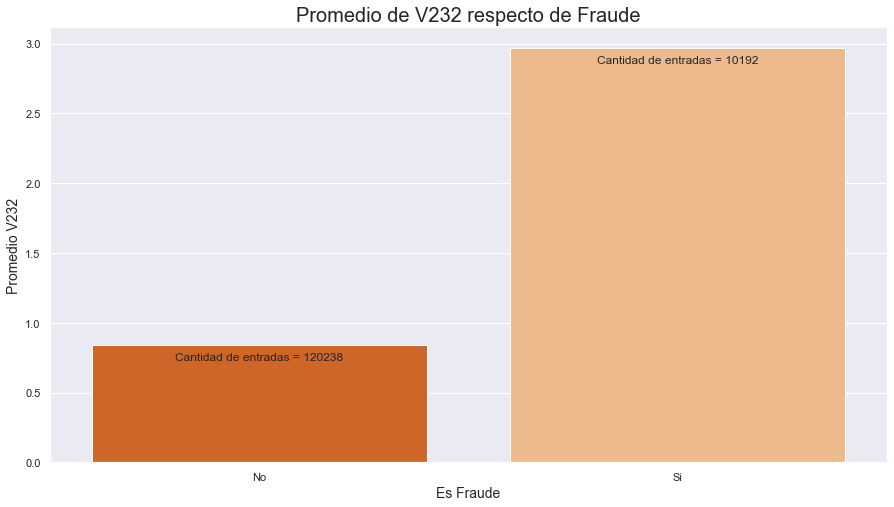

In [19]:
splot = sns.barplot(x= V232mean.index, y= V232mean, palette="Oranges_r")
splot.set_ylabel('Promedio V232', fontsize=14)
splot.set_xlabel('Es Fraude', fontsize=14)
splot.set_xticklabels(['No', 'Si'])
splot.set_title("Promedio de V232 respecto de Fraude", fontsize=20)

for i, p in enumerate(splot.patches):
    splot.annotate("Cantidad de entradas = "+format(train.groupby(by='isFraud')['V232'].count()[i], '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
